In [1]:
!pip install scikit-learn scipy numpy pandas matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 81.9 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 85.9 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 113.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 88.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 115.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 kB 40.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install sentence-transformers


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [3]:
from typing import Literal, List, Dict
import itertools
from langchain_core.embeddings import Embeddings
from langchain_openai.embeddings import OpenAIEmbeddings
from langchain_community.embeddings import HuggingFaceEmbeddings
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

/opt/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
OPENAI_API_KEY="voc-*"

**Embeddings Intuition**

In [5]:
class EmbeddingsFactory:
    def __init__(self, 
                 provider:Literal["OpenAI", "HugginFace"],
                 **kwargs):
        self.provider = provider
        self.kwargs = kwargs
    
    def create(self) -> Embeddings:
        if self.provider == "OpenAI":
            return OpenAIEmbeddings(
                **self.kwargs
            )
        if self.provider == "HugginFace":
            return HuggingFaceEmbeddings(
                **self.kwargs
            )
        raise ValueError(f"Unknown embeddings provider: {self.provider}")

In [6]:
sentence_list = [
    "I want to listen to music again",
    "I'm in the mood to hear music once more.",
    "Playstation has been a big part of my childhood",
    "I grew up playing Nintendo games",
    "The place I visited is the same as before",
    "The destination I returned to hasn’t changed over the years",
]

In [7]:
# HuggingFace
# https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2
embeddings = EmbeddingsFactory(
    provider="HugginFace",
    model_name="sentence-transformers/all-MiniLM-L6-v2",
    encode_kwargs={'normalize_embeddings': False},
#     api_key=HUGGINGFACE_API_KEY,
).create()

/tmp/ipykernel_394/1495706896.py:14: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the `langchain-huggingface package and should be used instead. To use it run `pip install -U `langchain-huggingface` and import as `from `langchain_huggingface import HuggingFaceEmbeddings``.
  return HuggingFaceEmbeddings(


In [8]:
# OpenAI
from dotenv import load_dotenv
load_dotenv()

embeddings = EmbeddingsFactory(
    provider="OpenAI",
    api_key=OPENAI_API_KEY,
).create()

In [9]:
embeddings_list = [
    embeddings.embed_query(sentence)
    for sentence in sentence_list
]

In [10]:
len(embeddings_list)

6

In [11]:
len(embeddings_list[0])

1536

In [12]:
embeddings_list[0][:10]

[-0.006489809136837721,
 -0.007244148291647434,
 -0.003266724292188883,
 -0.02570986934006214,
 -0.01738096959888935,
 0.011701606214046478,
 -0.004619547165930271,
 -0.006739177741110325,
 -0.0024609530810266733,
 0.0031794453971087933]

In [13]:
sentence_embeddings_map = [
    {"sentence":sentence, "embeddings":embeddings}
    for sentence,embeddings in zip(sentence_list, embeddings_list)
]

In [14]:
def print_similarity(
        sentence_embeddings_map:List[Dict], 
        i1:int=0, 
        i2:int=1)->None:
    s1 = sentence_embeddings_map[i1]["sentence"]
    e1 = sentence_embeddings_map[i1]["embeddings"]
    s2 = sentence_embeddings_map[i2]["sentence"]
    e2 = sentence_embeddings_map[i2]["embeddings"]
    print(f"Score: {np.dot(e1,e2):.2f}\n")
    print(f"Sentence {i1}: {s1}\nSentence {i2}: {s2}")

In [15]:
print_similarity(sentence_embeddings_map,0,1)

Score: 0.94

Sentence 0: I want to listen to music again
Sentence 1: I'm in the mood to hear music once more.


In [16]:
print_similarity(sentence_embeddings_map,2,3)

Score: 0.89

Sentence 2: Playstation has been a big part of my childhood
Sentence 3: I grew up playing Nintendo games


In [17]:
print_similarity(sentence_embeddings_map,4,5)

Score: 0.89

Sentence 4: The place I visited is the same as before
Sentence 5: The destination I returned to hasn’t changed over the years


In [18]:
print_similarity(sentence_embeddings_map,0,3)

Score: 0.77

Sentence 0: I want to listen to music again
Sentence 3: I grew up playing Nintendo games


**Visualizing Embeddings**

In [19]:
pca_model = PCA(n_components=2)
pca_model.fit(embeddings_list)
new_values = pca_model.transform(embeddings_list)

In [20]:
print(f"shape: {new_values.shape}")
print(new_values)

shape: (6, 2)
[[ 0.34099182 -0.07068622]
 [ 0.37881825 -0.05464228]
 [-0.11563774  0.3295989 ]
 [-0.12681789  0.31141246]
 [-0.20188459 -0.26697497]
 [-0.27546985 -0.24870788]]


In [21]:
def plot_2d(x_values, y_values, info_list):
    fig, ax = plt.subplots()
    scatter = ax.scatter(
        x_values,
        y_values,
        alpha=0.5,
        edgecolors='k',
        s=40
    )

    ax.set_title("Embeddings Viz in 2D")
    ax.set_xlabel("X_1")
    ax.set_ylabel("X_2")

    for i, info in enumerate(info_list):
        ax.annotate(info, (x_values[i], y_values[i]))
    
    plt.show()

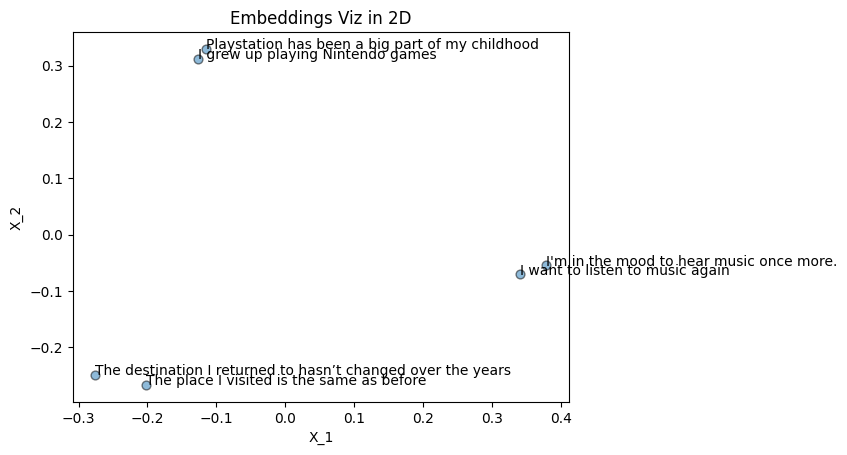

In [22]:
plot_2d(new_values[:,0], new_values[:,1], sentence_list)